In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
from tqdm import tqdm
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import nltk
import joblib
from nltk import word_tokenize 
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss


nltk.download('punkt')
nltk.download('stopwords')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
def clean_text(text):
    
    """
        text: a string
        return: modified initial string
    """
    
    cleaner = re.compile('<.*?>')
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    STOPWORDS = set(stopwords.words('english'))

    text = re.sub(cleaner, ' ', text)
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwords
    return text

In [3]:
def get_data():

    """
       Description: get_data imports pre-classified data set, the data set contains 
                    Job titles, Job descriptions and education_level.

       Pre_processing: The imported dataset goes through pre-processing,
                       pre-processing contains,
                       - Deduplication.
                       - Combining job titles and job description.
    """
    
    df = pd.read_csv('/content/drive/MyDrive/jobs_data_latest.csv')
    df.columns=['', 'title', 'description', 'category']

    df = df.drop_duplicates(subset =["title", "description"])

    df.reset_index(inplace = True, drop = True)

    # # Combining job_title and job description
    df['combine_text']=df['title']+' '+df['description']

    # # Apply text cleaning
    df["combine_text"] = [clean_text(str(i)) for i in df['combine_text']]


    return df

In [ ]:
# get_data
main_data = get_data()
print(main_data.shape)

(123367, 5)


In [ ]:
main_data

...                                       combine_text
0            0  ...  material handler 155 hr 500 bonus opportunity ...
1            1  ...  medication tech overview come work one oregons...
2            2  ...  security officer secret clearance lockheed mar...
3            3  ...  chef manager sodexo seeking chef manager autum...
4            4  ...  phlebotomist 2132 per hour ssm health seeking ...
...        ...  ...                                                ...
123362  123362  ...  systems engineer business group highlights int...
123363  123363  ...  regional sales director security detection aut...
123364  123364  ...  lpn toledo facilities 24+ working interim heal...
123365  123365  ...  cpe educator candidate interested career meani...
123366  123366  ...  physician assistant urgent care job2664477 reg...

[123367 rows x 5 columns]

# TEXT split

In [ ]:
X = main_data
y = main_data.category


xtrain, xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.2)

xtrain, xcv, ytrain, ycv = train_test_split(xtrain, ytrain, stratify=ytrain, test_size=0.2)

In [ ]:
print("main_data", X.shape, y.shape)
print("Xtrain", xtrain.shape, ytrain.shape)
print("Xtest", xtest.shape, ytest.shape)

main_data (123367, 5) (123367,)
Xtrain (78954, 5) (78954,)
Xtest (24674, 5) (24674,)


#T-sne

In [ ]:
# purpose of this program is to visualize high dimensional data in 2-d 
# to visulaize the text data first its needs to be converted into vectors.
# select sample dataframe to decrease execution time

x = xtrain_tfidf
y = ytrain

tsne = TSNE(n_components=2, perplexity=60, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {1:'red', 2:'blue', 3:'green'}
plt.figure(figsize=[20.0,10.0])

plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

# TEXT Pre processing 


In [10]:
with open('/content/drive/My Drive/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

AVG_Word_2_vec

In [ ]:
# average word_2_vec
# compute average word2vec for each job.

def get_avg_word_vec(text_column):

    Xtrain_job_avg_w2v_vectors = []
    for sentence in text_column:
        vector = np.zeros(300)
        cnt_words =0;
        for word in sentence.split():
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        Xtrain_job_avg_w2v_vectors.append(vector)

    return Xtrain_job_avg_w2v_vectors


Xtrain_avg_w2v_vector = get_avg_word_vec(xtrain['combine_text'])
Xtest_avg_w2v_vector = get_avg_word_vec(xtest['combine_text'])

Word_2_vec

In [8]:
# word_2_vec

def get_word_vec(text_column):

    Xtrain_job_avg_w2v_vectors = []
    for sentence in text_column:
        vector = np.zeros(300)

        for word in sentence.split():
            if word in glove_words:
                vector += model[word]

        Xtrain_job_avg_w2v_vectors.append(vector)

    return Xtrain_job_avg_w2v_vectors


xtrain_w2v_vector = get_word_vec(xtrain['combine_text'])
xtest_w2v_vector = get_word_vec(xtest['combine_text'])
xcv_w2v_vector = get_word_vec(xcv['combine_text'])

TFIDF vectorizer

In [ ]:
vectorizer = TfidfVectorizer(min_df=10,max_features=3000)

xtrain_tfidf = vectorizer.fit_transform(xtrain['combine_text'])
xtest_tfidf = vectorizer.transform(xtest['combine_text'])
xcv_tfidf = vectorizer.transform(xcv['combine_text'])

# MODEL


###SGD classifier for tfidf

100%|██████████| 10/10 [00:54<00:00,  5.41s/it]


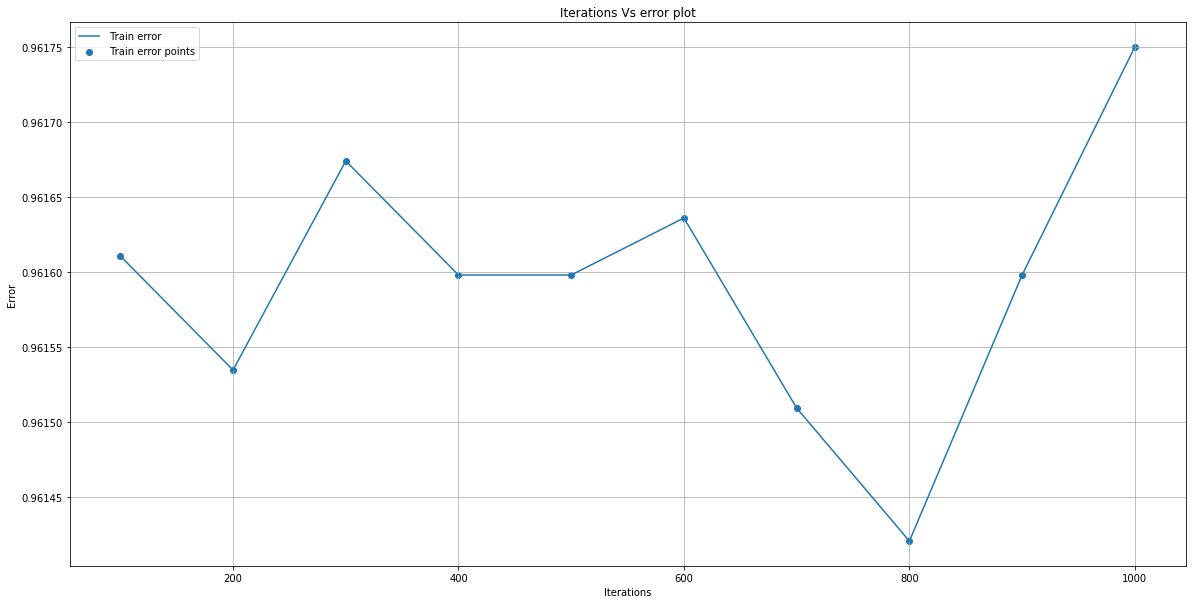

In [ ]:
iterations = [100,200,300,400,500,600,700,800,900,1000]

train_error = []
test_error = []

for i in tqdm(iterations):
    clf = SGDClassifier(learning_rate='constant',eta0=0.01,penalty=None, max_iter= i ,fit_intercept=True)
    clf.fit(xtrain_tfidf, ytrain)

    y_train_pred = clf.predict(xtrain_tfidf)
    train_error.append(accuracy_score(y_train_pred, ytrain))

    y_test_pred = clf.predict(xtest_tfidf)
    test_error.append(accuracy_score(y_test_pred, ytest))


plt.figure(figsize=[20.0,10.0])

plt.plot(iterations, train_error, label= ' Train error')
plt.scatter(iterations, train_error, label= ' Train error points')

#details of error plot
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Iterations Vs error plot")
plt.grid()
plt.show()

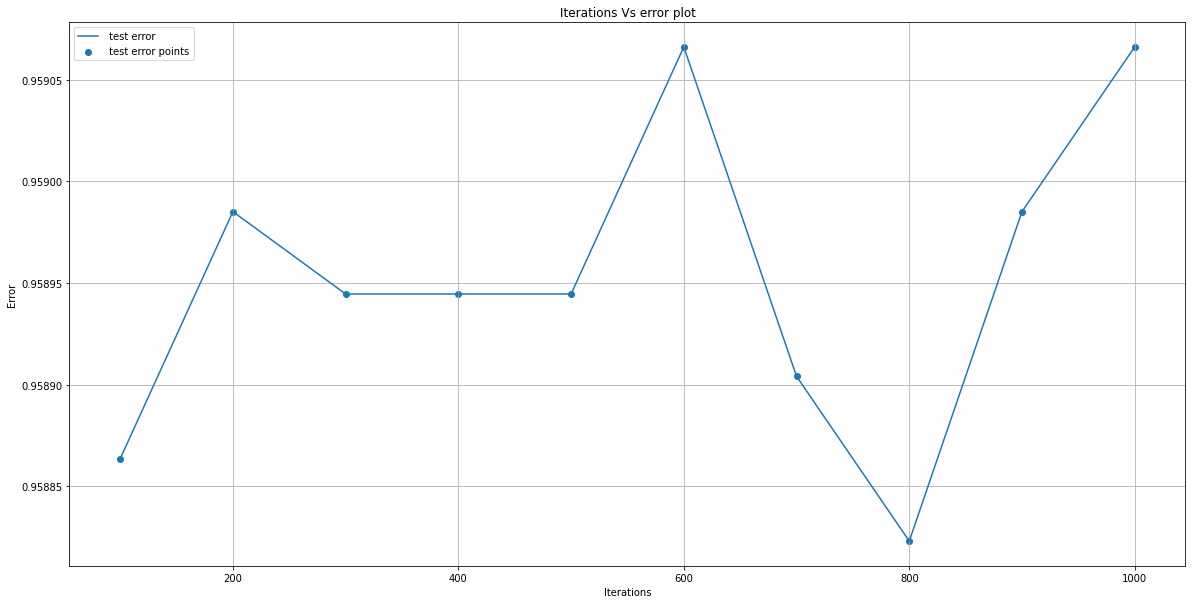

In [ ]:
plt.figure(figsize=[20.0,10.0])

plt.plot(iterations, test_error, label= ' test error')
plt.scatter(iterations, test_error, label= ' test error points')

#details of error plot
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Iterations Vs error plot")
plt.grid()
plt.show()

for alpha = 1e-06
Log Loss : 0.10330705466377067
for alpha = 1e-05
Log Loss : 0.11938292054269466
for alpha = 0.0001
Log Loss : 0.17876485787107343
for alpha = 0.001
Log Loss : 0.2736239479784946
for alpha = 0.01
Log Loss : 0.37316006867081614
for alpha = 0.1
Log Loss : 0.43467156474526597
for alpha = 1
Log Loss : 0.451455051386383
for alpha = 10
Log Loss : 0.4534600451537786
for alpha = 100
Log Loss : 0.4536903986994401


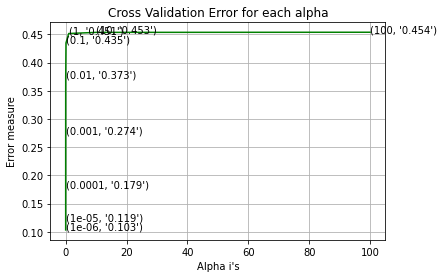

For values of best alpha =  1e-06 The train log loss is: 0.06988325816758412
For values of best alpha =  1e-06 The cross validation log loss is: 0.10330705466377067
For values of best alpha =  1e-06 The test log loss is: 0.10034094384086627


In [ ]:
# hyper parameter tuning of sgd classifier

# declare range of alpha(hyper parameter)
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)

    # use class_weight = 'balanced' for imbalanced dataset
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(xtrain_tfidf, ytrain)

    # calibrated classifier to calculate the probablity of predicted categorys
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(xtrain_tfidf, ytrain)
    sig_clf_probs = sig_clf.predict_proba(xcv_tfidf)
    cv_log_error_array.append(log_loss(ycv, sig_clf_probs, labels=clf.classes_, eps=1e-15))

    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(ycv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


# get best alpha for minimum log loss
best_alpha = np.argmin(cv_log_error_array)

# train model for on best hyper parameter
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log',random_state=42)
clf.fit(xtrain_tfidf, ytrain)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(xtrain_tfidf, ytrain)

predict_y = sig_clf.predict_proba(xtrain_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(ytrain, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(xcv_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(ycv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(xtest_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(ytest, predict_y, labels=clf.classes_, eps=1e-15))

In [ ]:
y_train_pred = sig_clf.predict(xtrain_tfidf)
print('train accuracy %s' % accuracy_score(y_train_pred, ytrain))

y_test_pred = sig_clf.predict(xtest_tfidf)
print('test accuracy %s' % accuracy_score(y_test_pred, ytest))

train accuracy 0.97693593738126
test accuracy 0.9693604604036637


In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    A = confusion_matrix(test_y, predict_y)
    # A = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j

    labels = [1,2,3]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

-------------------- Confusion matrix --------------------


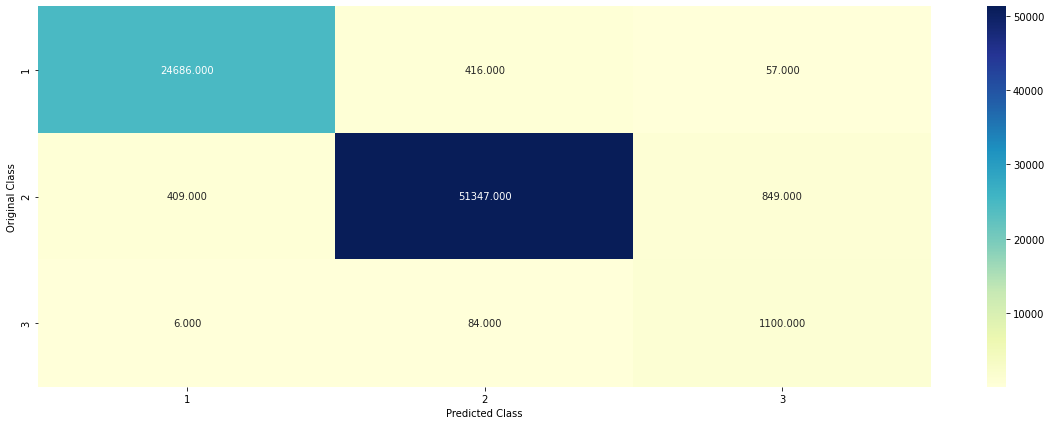

In [ ]:
plot_confusion_matrix(y_train_pred, ytrain)

-------------------- Confusion matrix --------------------


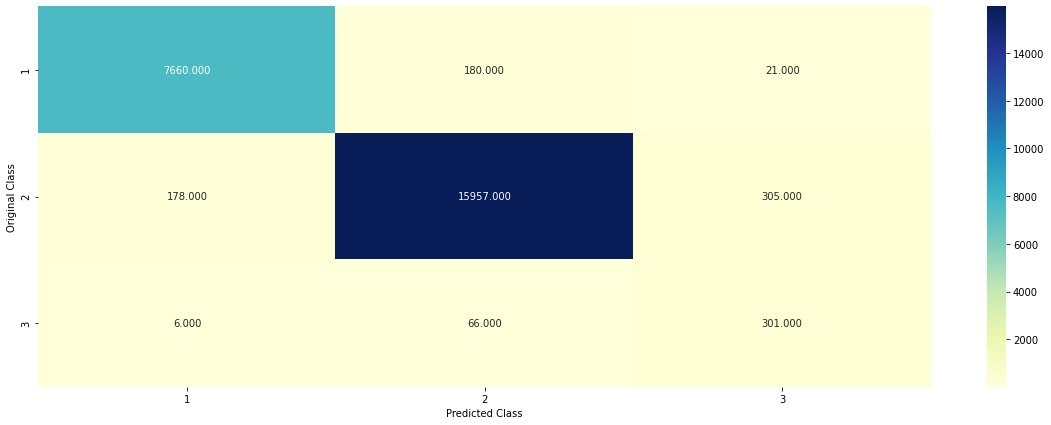

In [ ]:
plot_confusion_matrix(y_test_pred, ytest)

## SGD classifier for word_2_vec

100%|██████████| 10/10 [00:48<00:00,  4.81s/it]


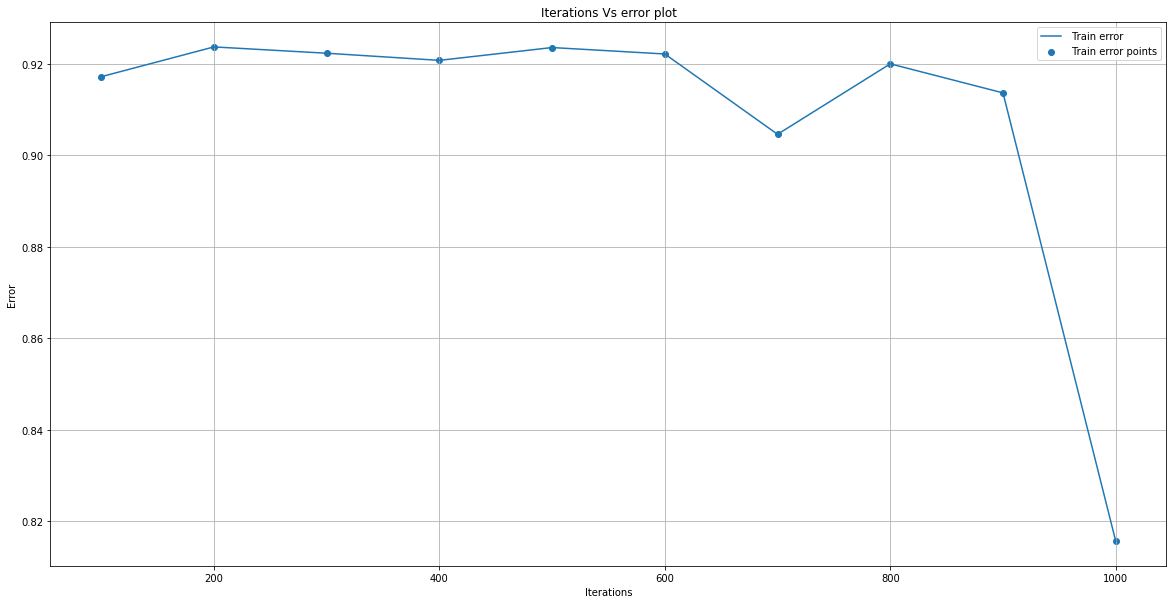

In [ ]:
iterations = [100,200,300,400,500,600,700,800,900,1000]

train_error = []
test_error = []

for i in tqdm(iterations):
    clf = SGDClassifier(learning_rate='constant',eta0=0.01,penalty=None, max_iter= i ,fit_intercept=True)
    clf.fit(xtrain_w2v_vector, ytrain)

    y_train_pred = clf.predict(xtrain_w2v_vector)
    train_error.append(accuracy_score(y_train_pred, ytrain))

    y_test_pred = clf.predict(xtest_w2v_vector)
    test_error.append(accuracy_score(y_test_pred, ytest))


plt.figure(figsize=[20.0,10.0])

plt.plot(iterations, train_error, label= ' Train error')
plt.scatter(iterations, train_error, label= ' Train error points')

#details of error plot
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Iterations Vs error plot")
plt.grid()
plt.show()

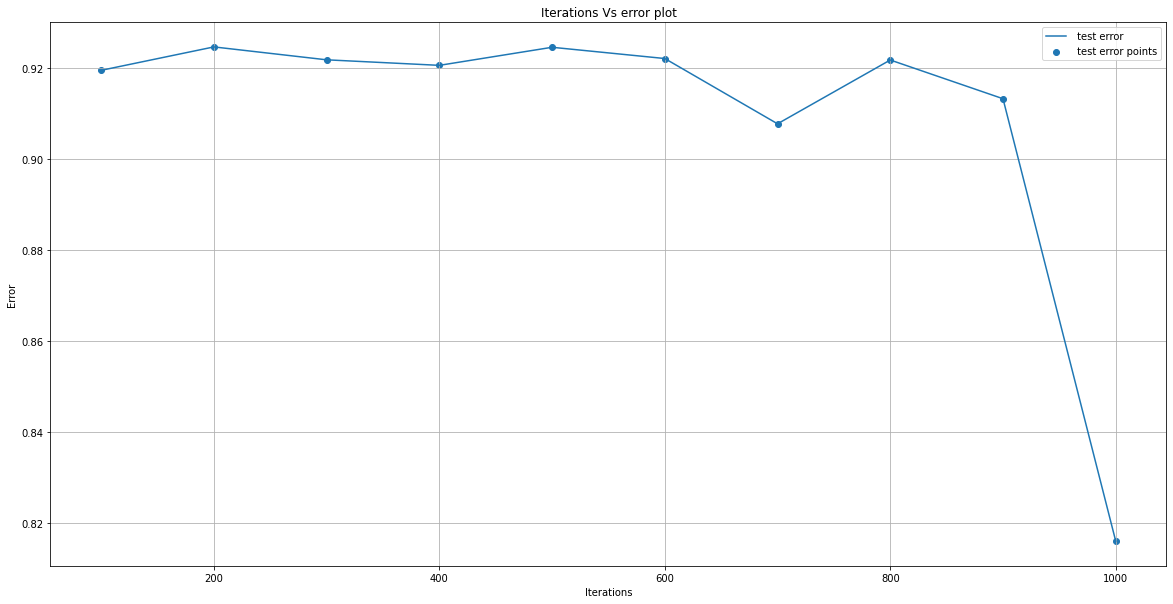

In [ ]:
plt.figure(figsize=[20.0,10.0])

plt.plot(iterations, test_error, label= ' test error')
plt.scatter(iterations, test_error, label= ' test error points')

#details of error plot
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Iterations Vs error plot")
plt.grid()
plt.show()

for alpha = 1e-06
Log Loss : 0.7338770174256944
for alpha = 1e-05
Log Loss : 0.5654688842981845
for alpha = 0.0001
Log Loss : 0.27418990892520173
for alpha = 0.001
Log Loss : 0.2618565032863397
for alpha = 0.01
Log Loss : 0.25575103769834096
for alpha = 0.1
Log Loss : 0.24654477600556032
for alpha = 1
Log Loss : 0.26731666926370906
for alpha = 10
Log Loss : 0.3141660450326598
for alpha = 100
Log Loss : 0.38607158195104163


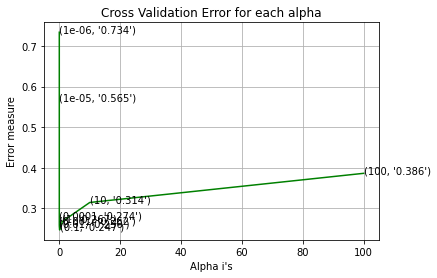

For values of best alpha =  0.1 The train log loss is: 0.23975316165837637
For values of best alpha =  0.1 The cross validation log loss is: 0.24654477600556032
For values of best alpha =  0.1 The test log loss is: 0.23734065505833984


In [ ]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(xtrain_w2v_vector, ytrain)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(xtrain_w2v_vector, ytrain)
    sig_clf_probs = sig_clf.predict_proba(xcv_w2v_vector)
    cv_log_error_array.append(log_loss(ycv, sig_clf_probs, labels=clf.classes_, eps=1e-15))

    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(ycv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log',random_state=42)
clf.fit(xtrain_w2v_vector, ytrain)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(xtrain_w2v_vector, ytrain)

predict_y = sig_clf.predict_proba(xtrain_w2v_vector)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(ytrain, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(xcv_w2v_vector)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(ycv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(xtest_w2v_vector)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(ytest, predict_y, labels=clf.classes_, eps=1e-15))

In [ ]:
y_train_pred = sig_clf.predict(xtrain_w2v_vector)
print('train accuracy %s' % accuracy_score(y_train_pred, ytrain))

y_test_pred = sig_clf.predict(xtest_w2v_vector)
print('test accuracy %s' % accuracy_score(y_test_pred, ytest))

train accuracy 0.9258808926716823
test accuracy 0.927454000162114


-------------------- Confusion matrix --------------------


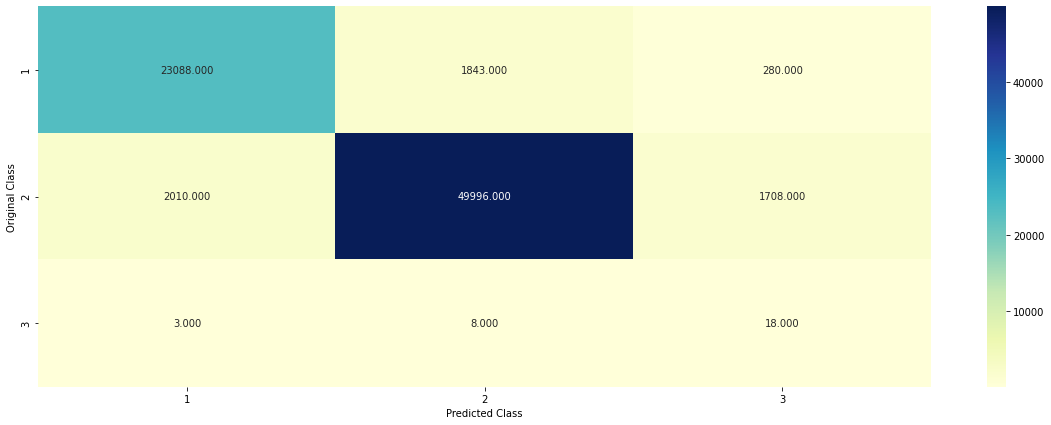

In [ ]:
plot_confusion_matrix(y_train_pred, ytrain)

-------------------- Confusion matrix --------------------


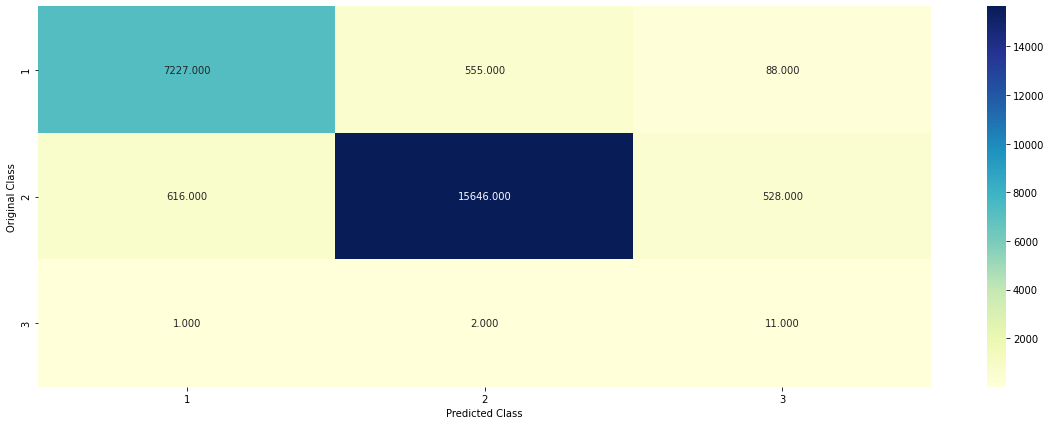

In [ ]:
plot_confusion_matrix(y_test_pred, ytest)

## save model

In [ ]:
# final_data = pd.DataFrame()


# final_data['job_descriptions'] = xtest['description']
# final_data['job_title'] = xtest['title']
# final_data['actual_category'] = xtest['category']
# final_data['predicted_category'] = y_test_pred

# final_data.to_csv("/content/drive/MyDrive/education_level_results.csv")

In [4]:
# get_data

main_data = get_data()
print(main_data.shape)

(123367, 5)


In [5]:
X = main_data
y = main_data.category

In [11]:
x_main = get_word_vec(X['combine_text'])

In [13]:
Classifier = SGDClassifier(alpha=0.1, loss='log', class_weight='balanced', penalty='l2', random_state=42)
Classifier.fit(x_main, y)

SGDClassifier(alpha=0.1, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [15]:
# save the model to disk
filename = '/content/drive/MyDrive/education_level_model_latest.sav'
joblib.dump(Classifier, filename)

['/content/drive/MyDrive/education_level_model_latest.sav']

In [17]:
test_data_point = x_main[0]

In [18]:
loaded_model = joblib.load('/content/drive/MyDrive/education_level_model_latest.sav')

In [21]:
result = loaded_model.predict(test_data_point.reshape(1, -1))

In [22]:
print(result)

[1]
